In [1]:
import sys
import os
working_path = '/home/groups/kipac/alpv95/Romani/'
sys.path.insert(0, working_path)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import junk
from jet_fns import *

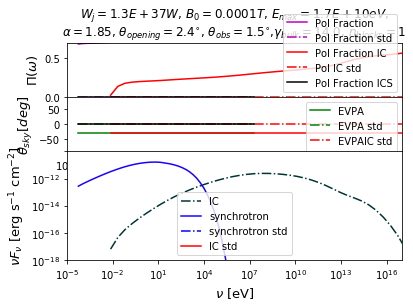

In [4]:
data_path = 'resultsNOLOSS/'
junk.plot_SED(working_path + data_path + 'TESTFIL1.txt',working_path + data_path + 'keyparams1.txt',working_path + data_path + 'freqrange1.txt')


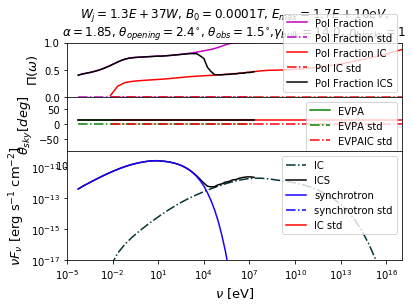

In [4]:
data_path = 'nbloc1_300/'
junk.plot_SED(working_path + data_path + 'TESTFIL1.txt',working_path + data_path + 'keyparams1.txt',working_path + data_path + 'freqrange1.txt')

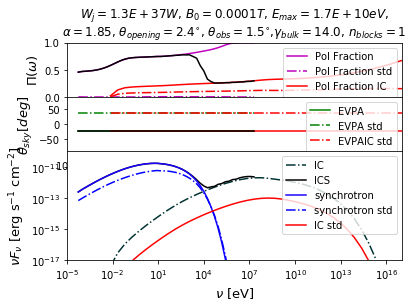

In [3]:
data_path = 'nbloc1_100/'
testfil_path = working_path + data_path + 'TESTFIL_mix.txt'
keyp_path = working_path + data_path + 'keyparams_mix.txt'
freq_path = working_path + data_path + 'freqrange_mix.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

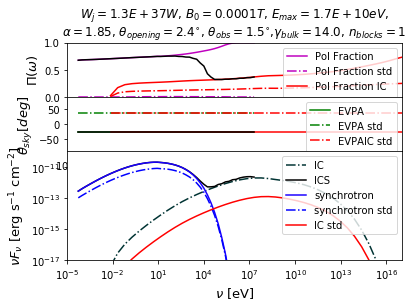

In [5]:
data_path = 'nbloc1_100/'
testfil_path = working_path + data_path + 'TESTFIL_nomix.txt'
keyp_path = working_path + data_path + 'keyparams_nomix.txt'
freq_path = working_path + data_path + 'freqrange_nomix.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

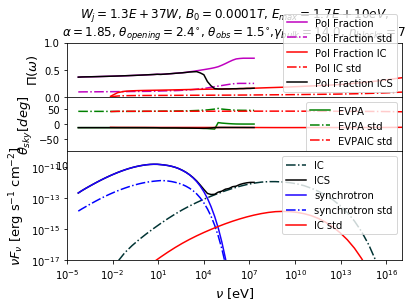

In [2]:
data_path = 'nbloc7_100/'
testfil_path = working_path + data_path + 'TESTFIL_nomix.txt'
keyp_path = working_path + data_path + 'keyparams_nomix.txt'
freq_path = working_path + data_path + 'freqrange_nomix.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

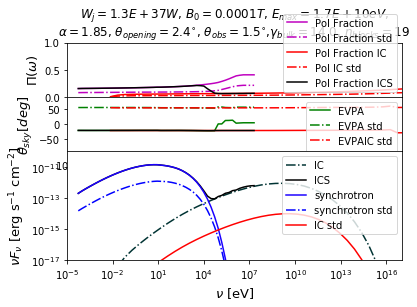

In [2]:
data_path = 'nbloc19_100/'
testfil_path = working_path + data_path + 'TESTFIL_nomix.txt'
keyp_path = working_path + data_path + 'keyparams_nomix.txt'
freq_path = working_path + data_path + 'freqrange_nomix.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

In [2]:
data_path = 'nbloc37_60/'
testfil_path = working_path + data_path + 'TESTFIL1.txt'
keyp_path = working_path + data_path + 'keyparams1.txt'
freq_path = working_path + data_path + 'freqrange1.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

OSError: /home/groups/kipac/alpv95/Romani/nbloc37_60/keyparams1.txt not found.

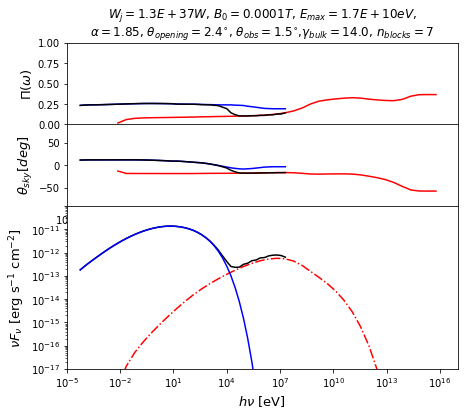

In [3]:
data_path = 'nbloc7_90/'
testfil_path = working_path + data_path + 'TESTFIL1.txt'
keyp_path = working_path + data_path + 'keyparams1.txt'
freq_path = working_path + data_path + 'freqrange1.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

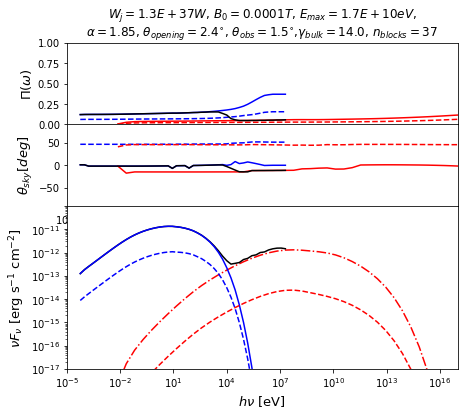

In [3]:
data_path = 'nbloc37_60/'
testfil_path = working_path + data_path + 'TESTFIL_final.txt'
keyp_path = working_path + data_path + 'keyparams_final.txt'
freq_path = working_path + data_path + 'freqrange_final.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

In [90]:
working_path = '/home/groups/kipac/alpv95/Romani/'
data_path = 'nbloc7_90/'
testfil_path = working_path + data_path + 'TESTFIL1.txt'
keyp_path = working_path + data_path + 'keyparams1.txt'
freq_path = working_path + data_path + 'freqrange1.txt'
array_size = 50

freq = np.loadtxt(freq_path)
fq_mids_IC = freq[:array_size,6]

In [91]:
#filename = ['nbloc1_100/TESTFIL_final.txt','nbloc7_100/TESTFIL_final.txt','nbloc19_100/TESTFIL_final.txt','nbloc37_60/TESTFIL_final.txt','nbloc1_100/TESTFIL_final.txt','nbloc7_2/TESTFIL1.txt','nbloc19_2/TESTFIL1.txt','nbloc37_2/TESTFIL1.txt']
#filename = ['nbloc1_100/TESTFIL_final.txt','nbloc7_100/TESTFIL_final.txt','nbloc19_100/TESTFIL_final.txt','nbloc37_60/TESTFILinit.txt']
filename = ['nbloc7_90/TESTFIL1.txt']
filename = [working_path + f for f in filename]
PI1 = []
PI_IC1 = []
STD1 = []
STD_IC1 = []


keyfile = keyp_path
freqfile = freq_path

if isinstance(filename, str):
    filename = [filename]
    legends = 1

keydat = np.loadtxt(keyfile)
if keydat.ndim == 1:
    keydat = np.expand_dims(keydat,axis=0)

#loading up data points for different blazars (need to change distances and redshift as well!!!)
d_Blazar = 1000E6*3.08E18 # pc in cm #276E6pc BL_Lac, 144E6 Mkn501, 131E6 Mkn421, 891E6 J2143, 1000E6 J0721, 1800E6 3C279
z = 0.3 #0.0686 BL-Lac, 0.034 Mkn501, 0.031 Mkn421, 0.211 J2143, 0.3 J0721, 0.536 3C279
theta_obs=keydat[0,2]#2.8


W_j=keydat[0,0]#5.0E20
gamma_bulk=keydat[0,1]#7.5#12.0

theta_open_p = keydat[0,3]
alpha = keydat[0,4]
B0 = keydat[0,5]
E_max = keydat[0,6]
n_blocks = keydat[0,7]
array_size = int(keydat[0,8]) #50, can change this here by hand

beta_bulk=(1.0-(gamma_bulk**(-2.0)))**(0.5)
doppler_factor = 1.0/(gamma_bulk*(1.0-beta_bulk*np.cos(np.deg2rad(theta_obs))))


#define the bins
frdata = np.loadtxt(freqfile)*doppler_factor#*doppler_factor#*gamma_bulk*2.8
fq_mins = frdata[:array_size,0]
fq_maxs = frdata[:array_size,1]
fq_mids = frdata[:array_size,2]
fq_mins_IC = frdata[:array_size,4]
fq_maxs_IC = frdata[:array_size,5]
fq_mids_IC = frdata[:array_size,6]
print(freqtoeV(fq_mids[13]))
print(freqtoeV(fq_mids_IC[13])) #make sure to compare same frequencies between different doppler factor models

for j,f in enumerate(filename):
    fullpi = np.loadtxt(f)
    # check0 = fullpi==0 #replacing 0s with nans for smart binning
    # fullpi[check0] = np.nan
    pi = np.zeros((array_size,3))
    stdpi = np.zeros((array_size,3))
    pi_IC = np.zeros((array_size, 3))
    stdpi_IC = np.zeros((array_size, 3))
    pi_ICS = np.zeros((array_size, 3))
    stdpi_ICS = np.zeros((array_size, 3))
    n_examples = int(fullpi.shape[0]/array_size)
    print(n_examples)

    for i in range(n_examples): #calculates average pi/evpa/power over many jet realisations
    #i=j*20
        pi[:,0] += fullpi[(i*array_size):(i*array_size)+array_size,0]
        pi[:,1] += fullpi[(i*array_size):(i*array_size)+array_size,1]
        pi[:,2] += fullpi[(i*array_size):(i*array_size)+array_size,2]
    
        pi_IC[:, 0] += fullpi[(i * array_size):(i * array_size) + array_size, 3]
        pi_IC[:, 1] += fullpi[(i * array_size):(i * array_size) + array_size, 4]
        pi_IC[:, 2] += fullpi[(i * array_size):(i * array_size) + array_size, 5]
    
        pi_ICS[:, 0] += fullpi[(i * array_size):(i * array_size) + array_size, 6]
        pi_ICS[:, 1] += fullpi[(i * array_size):(i * array_size) + array_size, 7]
        pi_ICS[:, 2] += fullpi[(i * array_size):(i * array_size) + array_size, 8]
    
    pi = pi / n_examples
    pi_IC = pi_IC / n_examples
    pi_ICS = pi_ICS / n_examples
    
    PI1.append(pi[13,0])
    PI_IC1.append(pi_IC[13,0])
    
    for i in range(n_examples): #calculates std of pi/evpa/power over many jet realisations
    #i=j*20
        stdpi[:,0] += (fullpi[(i*array_size):(i*array_size)+array_size,0] - pi[:,0])**2
        stdpi[:,1] += (fullpi[(i*array_size):(i*array_size)+array_size,1] - pi[:,1])**2
        stdpi[:,2] += ((fullpi[(i*array_size):(i*array_size)+array_size,2] - pi[:,2])*1.0E7*(1.0/((4.0*np.pi*d_Blazar**2.0)*(1.0+z)**2.0)))**2

        stdpi_IC[:, 0] += (fullpi[(i * array_size):(i * array_size) + array_size, 3] - pi_IC[:, 0]) ** 2
        stdpi_IC[:, 1] += (fullpi[(i * array_size):(i * array_size) + array_size, 4] - pi_IC[:, 1]) ** 2
        stdpi_IC[:, 2] += ((fullpi[(i * array_size):(i * array_size) + array_size, 5] - pi_IC[:, 2]) * 1.0E7 * (1.0 / ((4.0 * np.pi * d_Blazar ** 2.0) * (1.0 + z) ** 2.0)))**2

        stdpi_ICS[:, 0] += (fullpi[(i * array_size):(i * array_size) + array_size, 6] - pi_ICS[:, 0]) ** 2
        stdpi_ICS[:, 1] += (fullpi[(i * array_size):(i * array_size) + array_size, 7] - pi_ICS[:, 1]) ** 2
        stdpi_ICS[:, 2] += ((fullpi[(i * array_size):(i * array_size) + array_size, 8] - pi_ICS[:, 2]) * 1.0E7 * (
                         1.0 / ((4.0 * np.pi * d_Blazar ** 2.0) * (1.0 + z) ** 2.0))) ** 2

    stdpi = np.sqrt(stdpi / (n_examples))
    stdpi_IC = np.sqrt(stdpi_IC / (n_examples))
    stdpi_ICS = np.sqrt(stdpi_ICS / (n_examples))
    
    STD1.append(stdpi[13,0]/np.sqrt(n_examples))
    STD_IC1.append(stdpi_IC[13,0]/np.sqrt(n_examples))


0.06524281980954663
9933.397536441504
1


In [50]:
PI1[0] = PI[0]
PI_IC1[0] = PI_IC[0]
STD1[0] = STD[0]
STD_IC1[0] = STD_IC[0]

In [92]:
np.array(PI_IC)/np.array(PI)

array([0.35231834, 0.37064719, 0.38400673, 0.35752252, 0.35231834,
       0.3531381 , 0.34701855, 0.35132005])

In [93]:
np.array(PI_IC1)/np.array(PI1)

array([0.38949052])

Text(0,0.5,'$\\Pi$')

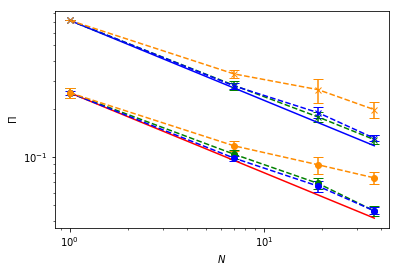

In [87]:
#plt.figure(figsize=(7,6))
plt.errorbar([1,7,19,37],PI_IC[:4],yerr=STD_IC[:4],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([1,7,19,37],PI_IC[4:]*np.array([1,1.5,0.9,1]),yerr=np.array(STD_IC[4:])*0.5,ls='--',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([1,7,19,37],PI_IC1[:4],yerr=STD_IC1[:4],ls='--',marker='o', capsize=5, capthick=1,color='darkorange')

plt.plot([1,7,19,37],[PI_IC[0],PI_IC[0]/np.sqrt(7),PI_IC[0]/np.sqrt(19),PI_IC[0]/np.sqrt(37)],color='r')

plt.errorbar([1,7,19,37],PI[:4],yerr=STD[:4],ls='--',marker='x', capsize=5, capthick=1,color='g')
plt.errorbar([1,7,19,37],PI[4:]*np.array([1,1.5,0.9,1]),yerr=np.array(STD[4:])*0.5,ls='--',marker='x', capsize=5, capthick=1,color='b')
plt.errorbar([1,7,19,37],PI1[:4],yerr=STD1[:4],ls='--',marker='x', capsize=5, capthick=1,color='darkorange')

plt.plot([1,7,19,37],[PI[0],PI[0]/np.sqrt(7),PI[0]/np.sqrt(19),PI[0]/np.sqrt(37)],color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$\Pi$')

Text(0,0.5,'$\\Pi / \\Pi_1$')

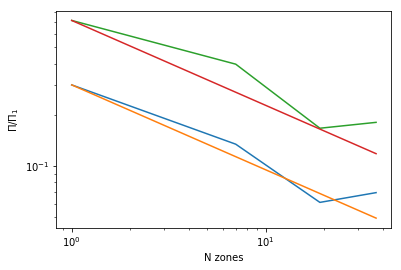

In [21]:
plt.plot([1,7,19,37],PI_IC)
plt.plot([1,7,19,37],[PI_IC[0],PI_IC[0]/np.sqrt(7),PI_IC[0]/np.sqrt(19),PI_IC[0]/np.sqrt(37)])
plt.plot([1,7,19,37],PI)
plt.plot([1,7,19,37],[PI[0],PI[0]/np.sqrt(7),PI[0]/np.sqrt(19),PI[0]/np.sqrt(37)])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N zones')
plt.ylabel(r'$\Pi / \Pi_1$')

In [54]:
error = np.array(PI_IC)/np.array(PI) * np.sqrt((np.array(STD)/np.array(PI))**2 + (np.array(STD_IC)/np.array(PI_IC))**2)
error1 = np.array(PI_IC1)/np.array(PI1) * np.sqrt((np.array(STD1)/np.array(PI1))**2 + (np.array(STD_IC1)/np.array(PI_IC1))**2)



In [57]:
error[5] = error[5]*0.5
error[6] = error[6]*0.5
error[7] = error[7]*0.5


Text(0.5,0,'$N$')

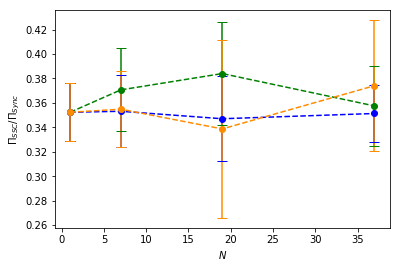

In [72]:
plt.errorbar([1,7,19,37],np.array(PI_IC[:4])/np.array(PI[:4]),yerr=error[:4],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([1,7,19,37],np.array(PI_IC[4:])/np.array(PI[4:]),yerr=error[4:],ls='--',marker='o', capsize=5, capthick=1, color='b')
plt.errorbar([1,7,19,37],np.array(PI_IC1[:4])/np.array(PI1[:4]),yerr=error1[:4],ls='--',marker='o', capsize=5, capthick=1,color='darkorange')
plt.ylabel(r"$\Pi_{SSC} / \Pi_{Sync}$")
plt.xlabel(r"$N$")